In [1]:
# import relevant libraries
import sys
import pickle
import pandas as pd

In [2]:
# import custom modules
sys.path.append('scripts')
import cons
from PreProcessData.gen_counties_data import gen_counties_data
from PreProcessData.gen_preaggregate_data import gen_preaggregate_data
from utilities.time_data import time_data
from SeaBornPlots.time_plot import time_plot
from SeaBornPlots.map_plot import map_plot

In [3]:
pre_agg_data_dict = gen_preaggregate_data(return_data = True)

In [4]:
map_data_dict = gen_counties_data(pre_agg_data_dict = pre_agg_data_dict, return_data = True)

# Visualisation Proto-Types

## GIS Heat Map

* West coast experiences significantly more rainfall than the east coast

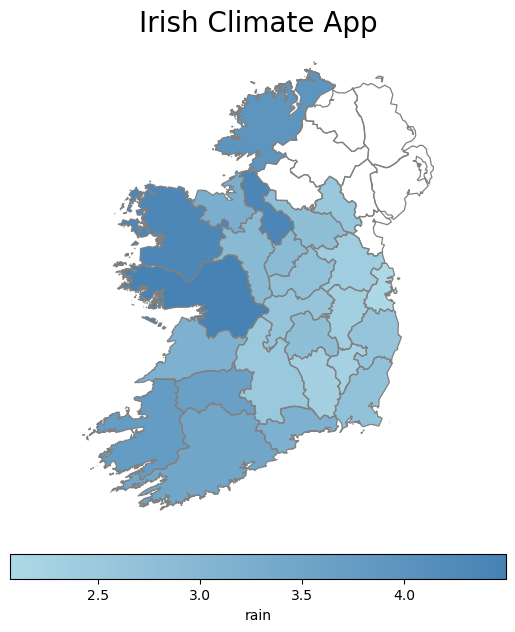

0

In [5]:
map_plot(map_data_dict, stat = 'mean', col = 'rain')

## Time Series Plots

In [6]:
date_strftime_dict = cons.date_strftime_dict
counties = cons.counties
agg_dict = {col:'mean' for col in cons.col_options}

### Yearly Max Termperature by County

In [7]:
# set year strftime pattern and time span
year_strftime = date_strftime_dict['year']
time_span = ['2010', '2019']
# generate the time series data
year_data = time_data(data = pre_agg_data_dict['mean'], agg_dict = agg_dict, time_span = time_span, counties = counties, strftime = year_strftime)

In [8]:
year_data.head()

,county,date,date_str,maxtp,mintp,gmin,soil,wdsp,sun,evap,rain,index
0,carlow,2010-01-01,2010,12.718415,4.539533,2.113600,10.081254,6.310376,NaN,1.936051,2.121423,0
1,carlow,2011-01-01,2011,14.067760,6.187987,3.604837,11.045850,7.618274,NaN,1.920778,2.048290,1
2,carlow,2012-01-01,2012,13.283244,6.115176,4.158985,10.709982,7.083180,NaN,1.853408,2.283727,2
3,carlow,2013-01-01,2013,13.757720,6.072729,3.723912,11.026273,7.458128,NaN,2.163940,2.075275,3
4,carlow,2014-01-01,2014,14.329563,6.422037,4.012616,11.390672,7.376530,NaN,2.049178,3.030310,4


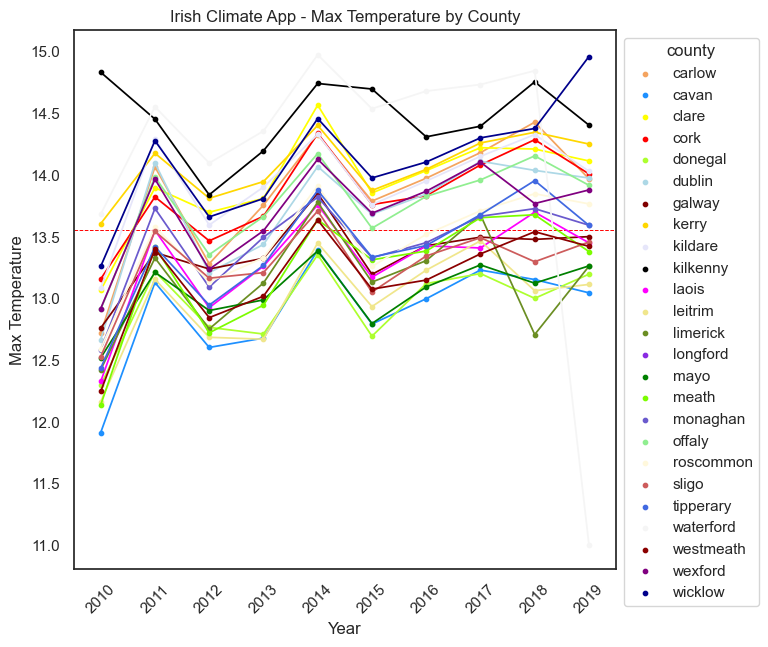

0

In [9]:
time_plot(data = year_data, 
          x = 'index', 
          y = 'maxtp', 
          hue = 'county', 
          strftime = year_strftime, 
          refline = year_data['maxtp'].mean(), 
          title = 'Irish Climate App - Max Temperature by County',
          xlabel = 'Year',
          ylabel = 'Max Temperature'
         )

### Monthly Min Temperature by County

In [10]:
# set month strftime pattern and time span
month_strftime = date_strftime_dict['month']
time_span = ['01', '12']
# generate the time series data
month_data = time_data(data=pre_agg_data_dict['mean'], agg_dict=agg_dict, time_span=time_span, counties=counties, strftime=month_strftime)

In [11]:
month_data.head()

,county,date,date_str,maxtp,mintp,gmin,soil,wdsp,sun,evap,rain,index
0,carlow,1900-01-01,01,8.239728,2.262649,-0.634409,4.625738,8.222581,NaN,0.483656,2.474703,0
1,carlow,1900-02-01,02,8.719970,2.219354,-0.136018,5.253277,8.487743,NaN,0.907833,2.357713,1
2,carlow,1900-03-01,03,10.615450,2.607810,-0.177634,6.958703,7.949236,NaN,1.670538,1.997963,2
3,carlow,1900-04-01,04,13.258246,4.261404,1.369333,10.470202,7.108772,NaN,2.636444,1.535789,3
4,carlow,1900-05-01,05,15.948289,6.823619,4.468000,14.161746,7.234753,NaN,3.556559,1.787508,4


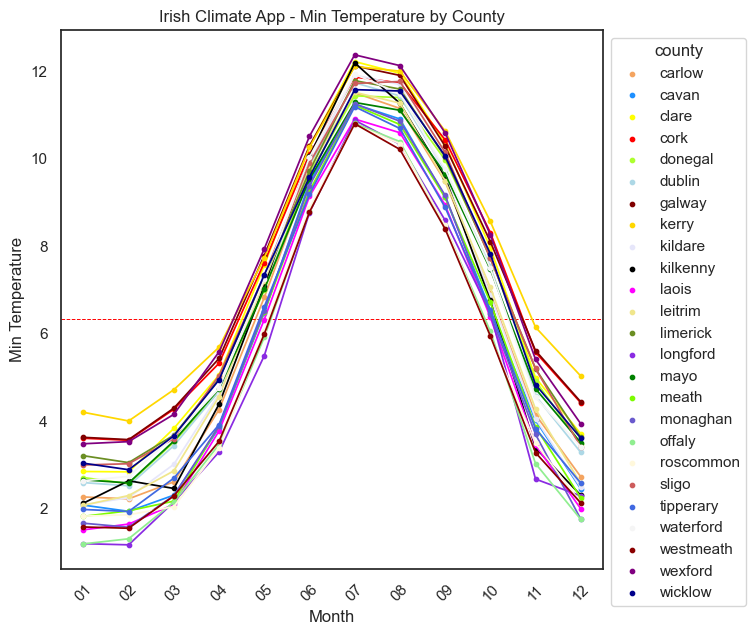

0

In [12]:
time_plot(data = month_data, 
          x = 'index',
          y = 'mintp', 
          hue = 'county', 
          strftime = year_strftime, 
          refline = year_data['mintp'].mean(), 
          title = 'Irish Climate App - Min Temperature by County',
          xlabel = 'Month',
          ylabel = 'Min Temperature'
         )